# Project: Investigate a Dataset (No Show Medical Appoitment Data!)
## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#Prediction">Prediction</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
# Introduction#

Medical appointments are the most common hospital queue management system, and are designed to help distribute health care resource reasonably and efficiently for healthcare provider and institution and patients. Patients can arrange their health check up according to their time schedule and save time rather than waiting in the walk-in clinic. On the other side, health provider can avoid unpredictability in patient flow. However, in reality, some patients do not show up on their scheduled time which can cause many issues.

Firstly, from health institution side, on show patient will leave a blank time slot without any occupation which lead to the time waste and financial loss for the hospital. In general , a common patient visit will generate about 196 dollars, and for a hospital with 100000 primary care visit and 10% non show rate will make up to about nearly 2 million revenue loss. This huge financial loss could influence the money flow in the institution and waste of doctor time.

Secondly, from personal side, a missing appointment could result in complex medical condition, failure to diagnosis a medical condition at early stage. For some chronic patient, missed followup appointment can lead to worse controlled disease, readmission to the hospital or emergency department which place a heavy burden on the public health resource. In addition, because no show patients do not inform the institution ahead of their appointment, the time slot they reserved is blocked from other patients, which prevent the patients really in needs to get a health care earlier. So a significant body of health care research has focused on studying the features of non show patient, and on developing techniques and tools to use medical appointment record to make prediction of non shown of patients. 

In this study, we will investigate the medical appointment record from several hospitals in Brazil. The appointment dataset contains over 100K medical records, starting from 2016-04-29 to 2016-06-08 and covering 81 neighborhoods. The over all non-show rate is around 30%, and all of them are primary care visit. This high no show rate can definitely cause many healthcare resource waste and also influence the normal turn over in a health institution. 

### Questions:
In this data analysis, we would like to dig deep into the noshow phenomenon in a Brazil public health system. We would like to figure out following questions:

>1. What is proportion of the noshow appointments?
>2. Is noshow apointment related to age or gender?
>3. Does people with chronic disease tend to noshow more often than others?
>4. Does longer leadtime result in high noshow proportion?
>5. Does people receive government support tend to showup more?
>6. In this study, there is a simple remedy method of reduce noshow proportion by SMS reminder? Does implemanting this method really reduce the noshow proportion?



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

> **Goals**: In this section of the report, we will load in the no show medical appoitment data, check for cleanliness, and then trim and clean the dataset for analysis. 

### General Properties

In [2]:
# load 'noshow appointments' data into dataframe
df = pd.read_csv('KaggleV2-May-2016.csv')
df.head(2)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [4]:
# check df size
print(df.shape)
df.describe()

(110527, 14)


,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


-There are 110527 medical appointments and 14 features. The min age is -1 which is unreasonable which we will take care later on. The mean and media of age is nearly the same, indicating the age feature has a normal distribution.Only a samll portion of patients receive scholarship. The highest pre-exsisting condition is hipertension,accounting for nearly 19% of the total patient pool. Not all patients received SMS reminder, only 32% got SMS.

In [5]:
columns = ['Gender', 'Scholarship', 'Hipertension', 'Diabetes', 'Alcoholism', 'Handcap', 'SMS_received', 'No-show']
for i in columns:
    print("There are {} values in {}, which are {}.".format(len(df[i].unique()), i, df[i].unique()))


There are 2 values in Gender, which are ['F' 'M'].
There are 2 values in Scholarship, which are [0 1].
There are 2 values in Hipertension, which are [1 0].
There are 2 values in Diabetes, which are [0 1].
There are 2 values in Alcoholism, which are [0 1].
There are 5 values in Handcap, which are [0 1 2 3 4].
There are 2 values in SMS_received, which are [0 1].
There are 2 values in No-show, which are ['No' 'Yes'].


In [6]:
# check weather there are several data with same patient and several visits
df['PatientId'].nunique()

62299

We don't know the "PatientID" is assigned to the patients throughout their lifetime like some kind of identification, or it is just a random assigned number from the hospital. In general, in order to keep the privacy and security of the patients, the dataset will not reveal any personal information (like their permanent identification number), so I am more inclined to think that this is a medical identification number shared within the same medical institution.  We will try to deal with it later on.

### Data Cleaning 
Just as I mentioned before, this dataset is very neat, we do not need to do too much clean up work. 
> First, we will rename several columns to make consistent and easy for future assignment.
> Secondly, convert the scheduleday and appoitmentday to standard data style and calculate the lead time between them.
> 1. df_new is for categorical analysis with lots of zero values in budget_adj and revenue_adj.
> 2. df_fin is for numerical analysis dealing with budget, revenue and so on.

In [7]:
df['No-show'].value_counts()

No     88208
Yes    22319
Name: No-show, dtype: int64

There is no duplicated row calling the pandas, but this doesn't mean there are no revisit or some kind of repeated information. So we will dig more into this information.


In [8]:
# rename some column
df.rename(columns = {'AppointmentID':'AppointmentId','Hipertension':'Hypertension', 'Handcap':'Handicap',
                     'No-show':'No_show'}, inplace = True)
df.head(2)

,PatientId,AppointmentId,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No_show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No


In [9]:
# datastamp 
df['ScheduledDay_Origin'] = df['ScheduledDay'].copy()
df['ScheduledDay'] = pd.to_datetime(df['ScheduledDay']).dt.date
df['AppointmentDay'] = pd.to_datetime(df['AppointmentDay']).dt.date
print("For scheduled appointments,the starting day is {}, and the ending day is {}.".format(min(df['ScheduledDay']),max(df['ScheduledDay'])))
print("For appointments,the starting day is {}, and the ending day is {}.".format(min(df['AppointmentDay']),max(df['AppointmentDay'])))
#df.head(2)

For scheduled appointments,the starting day is 2015-11-10, and the ending day is 2016-06-08.
For appointments,the starting day is 2016-04-29, and the ending day is 2016-06-08.


# All the appointments happened within around 40 days.

In [10]:
# calculate the leadtime
df['Leadtime'] = df['AppointmentDay'] - df['ScheduledDay']
df['Leadtime'] = df['Leadtime'].apply(lambda x: x.days)
df['Leadtime'].describe()

count    110527.000000
mean         10.183702
std          15.254996
min          -6.000000
25%           0.000000
50%           4.000000
75%          15.000000
max         179.000000
Name: Leadtime, dtype: float64

Because the mean is higher than media, this means that the lead time data is right skewed with most of appointment has short lead time. Usually, patients will book yearly check up or long-ter, conditional follow-up visit in advance, if the lead time is short, indicating most of the hospital visits are related to some recently developed condition. These condition sometimes can self cured or disappeared, some will consist or become worse and have to go to emergency department. But we don't know whether this will related to high show up rate. The minimum lead time is under zero which is unreasonable, we will check all lead time below zero.

In [11]:
#check any data that has a lead time below zero
df.query('Leadtime <0')

,PatientId,AppointmentId,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No_show,ScheduledDay_Origin,Leadtime
27033,7.839273e+12,5679978,M,2016-05-10,2016-05-09,38,RESISTÊNCIA,0,0,0,0,1,0,Yes,2016-05-10T10:51:53Z,-1
55226,7.896294e+12,5715660,F,2016-05-18,2016-05-17,19,SANTO ANTÔNIO,0,0,0,0,1,0,Yes,2016-05-18T14:50:41Z,-1
64175,2.425226e+13,5664962,F,2016-05-05,2016-05-04,22,CONSOLAÇÃO,0,0,0,0,0,0,Yes,2016-05-05T13:43:58Z,-1
71533,9.982316e+14,5686628,F,2016-05-11,2016-05-05,81,SANTO ANTÔNIO,0,0,0,0,0,0,Yes,2016-05-11T13:49:20Z,-6
72362,3.787482e+12,5655637,M,2016-05-04,2016-05-03,7,TABUAZEIRO,0,0,0,0,0,0,Yes,2016-05-04T06:50:57Z,-1


These zero data are real appointment and happened to be some typo errors. We have no way to track the original data, so we just discard them as wrong data.

In [12]:
# drop leadtime less than 0 
df = df[df['Leadtime'] >=0 ]

In [13]:
# get statisticial description about patient age
df['Age'].describe()

count    110522.000000
mean         37.089041
std          23.110064
min          -1.000000
25%          18.000000
50%          37.000000
75%          55.000000
max         115.000000
Name: Age, dtype: float64

There should not have a patient with ago below zero, like before we just discard them as error data.

In [14]:
# drop age below 0
df = df[df['Age'] >= 0]

# creat a new column by patients' age
Age_category = ['0-9', '10-19','20-29', '30-39', '40-49', '50-59','60-69', '70-79','80-89','90-99','100+']
Age_edges = [ 0, 9, 19, 29, 39, 49, 59, 69, 79, 89, 99, 115]
df['Patient'] = pd.cut(df['Age'], Age_edges, labels=Age_category)
df.shape

(110521, 17)

In [15]:
# create leadtime based on patient's waiting time before appointment
Leadtime_category = ['Sameday', 'Oneday','Oneweek', 'Twoweek','Threeweek','OverOneMonth']
Leadtime_edges = [-1, 0, 1, 6, 13, 29, 179]
df['Leadtime_cat'] = pd.cut(df['Leadtime'], Leadtime_edges, labels = Leadtime_category)


In [16]:
# the No_show column with 'Yes' and 'No' is somehow a little comfusing, so add a new column 'Result' with values of 'Show' and 'Noshow'.
df.loc[df['No_show']=='Yes', 'Result'] = 'Noshow'
df.loc[df['No_show']=='No', 'Result'] = 'Show'
df.head(2)

,PatientId,AppointmentId,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No_show,ScheduledDay_Origin,Leadtime,Patient,Leadtime_cat,Result
0,2.987250e+13,5642903,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No,2016-04-29T18:38:08Z,0,60-69,Sameday,Show
1,5.589978e+14,5642503,M,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No,2016-04-29T16:08:27Z,0,50-59,Sameday,Show


In [17]:
# check weather there are several data with same patient and several visits
df['PatientId'].nunique()

62298

count    110521.000000
mean          3.540440
std           6.562162
min           1.000000
25%           1.000000
50%           2.000000
75%           4.000000
max          88.000000
Name: Patient_counts, dtype: float64


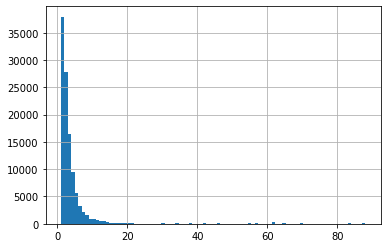

In [18]:
# copy df to a new df_repeat
df_repeat = df.copy()

# count patients revisits
Patient_counts = df_repeat['PatientId'].value_counts().rename('Patient_counts')
df_repeat = df_repeat.merge(Patient_counts.to_frame(), left_on='PatientId',right_index=True)

# check revisit statistic and histgraph
print(df_repeat['Patient_counts'].describe())
df_repeat['Patient_counts'].hist(bins=88)



# A few patients had visisted the hospital more than 40 times in 40 days.

In [19]:
df_repeat.query('Patient_counts==88').sort_values('AppointmentDay').head(5)


,PatientId,AppointmentId,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No_show,ScheduledDay_Origin,Leadtime,Patient,Leadtime_cat,Result,Patient_counts
3006,8.221459e+14,5638995,M,2016-04-29,2016-04-29,38,REDENÇÃO,0,0,0,0,0,0,No,2016-04-29T08:38:44Z,0,30-39,Sameday,Show,88
3060,8.221459e+14,5642878,M,2016-04-29,2016-04-29,38,REDENÇÃO,0,0,0,0,0,0,No,2016-04-29T18:02:42Z,0,30-39,Sameday,Show,88
3093,8.221459e+14,5640809,M,2016-04-29,2016-04-29,38,REDENÇÃO,0,0,0,0,0,0,No,2016-04-29T11:27:34Z,0,30-39,Sameday,Show,88
35675,8.221459e+14,5649163,M,2016-05-02,2016-05-02,38,REDENÇÃO,0,0,0,0,0,0,No,2016-05-02T17:57:36Z,0,30-39,Sameday,Show,88
25428,8.221459e+14,5649058,M,2016-05-02,2016-05-02,38,REDENÇÃO,0,0,0,0,0,0,No,2016-05-02T17:38:17Z,0,30-39,Sameday,Show,88


These data looks rediculous, the patient id, gender, age and neighborhood is identical, indicating this is the same person for all these visits. And look at the appointment day, on 2016-04-29, he visited the office three times which seldomly happens in real life. And this patient has no preexisting condition, 100% show up in the appointment. I doubt this is some system generated data which is used to test the running of the hosptcial quenry management. Since we have no way to track back the origin of this data point, we will not discard this data point but drop any duplicated visits in the same day.

In [20]:
df_repeat.drop_duplicates(subset = ['PatientId', 'AppointmentDay'], keep='first',inplace=True)


In [21]:
df_repeat.drop(['Patient_counts'], axis=1, inplace=True)

count    101803.000000
mean          2.566889
std           2.482815
min           1.000000
25%           1.000000
50%           2.000000
75%           3.000000
max          26.000000
Name: Patient_counts, dtype: float64


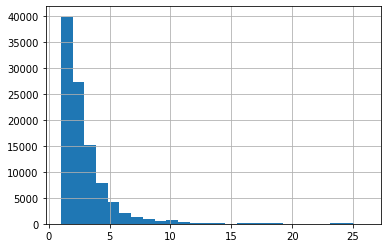

In [22]:
Patient_counts = df_repeat['PatientId'].value_counts().rename('Patient_counts')

df_repeat = df_repeat.merge(Patient_counts.to_frame(),
                                left_on='PatientId',
                                right_index=True)

print(df_repeat['Patient_counts'].describe())
df_repeat['Patient_counts'].hist(bins =26)

In [23]:
#calculate what percentage of data points have been dropped?
(df.shape[0] - df_repeat.shape[0])/df.shape[0]

0.07888093665457244

In [24]:
df_repeat['PreviousApp'] = df_repeat.sort_values(by = ['PatientId','ScheduledDay']).groupby(['PatientId']).cumcount()+1


In [25]:
df_revisit = df_repeat[df_repeat.duplicated(['PatientId'],keep=False)]
print(df_revisit.shape)
print(df_revisit['PatientId'].nunique())

(61943, 21)
22438


In [79]:
df_revisit['PreviousShow'] = df_revisit.sort_values('PreviousApp',ascending = True).groupby('PatientId')['Result'].transform('first')
df_revisit.head(5)

C:\Users\Hong\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,PatientId,AppointmentId,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,...,No_show,ScheduledDay_Origin,Leadtime,Patient,Leadtime_cat,Result,Patient_counts,PreviousApp,PreviousShow,ResultNo
3,8.679512e+11,5642828,F,2016-04-29,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,...,No,2016-04-29T17:29:31Z,0,0-9,Sameday,Show,2,2,Noshow,1.0
48641,8.679512e+11,5612472,F,2016-04-25,2016-05-19,8,PONTAL DE CAMBURI,0,0,0,...,Yes,2016-04-25T08:19:19Z,24,0-9,Threeweek,Noshow,2,1,Noshow,0.0
5,9.598513e+13,5626772,F,2016-04-27,2016-04-29,76,REPÚBLICA,0,1,0,...,No,2016-04-27T08:36:51Z,2,70-79,Oneweek,Show,2,1,Show,1.0
98967,9.598513e+13,5732325,F,2016-05-24,2016-06-01,76,REPÚBLICA,0,1,0,...,No,2016-05-24T11:19:51Z,8,70-79,Twoweek,Show,2,2,Show,1.0
7,3.449833e+12,5630575,F,2016-04-27,2016-04-29,39,GOIABEIRAS,0,0,0,...,Yes,2016-04-27T15:39:58Z,2,30-39,Oneweek,Noshow,2,1,Noshow,0.0


<a id='eda'></a>
# Exploratory Data Analysis
> **Goals**: In this section of the report, we will analyze the data set based different features, including Age, Lead time, Scholarship(government supported), and Gender and see if there is some clear trend or correlations between these features and show up appointments. The feature analyzed is as following:



### Lead time: 
> Commonly, the longer we wait for the appointment, the higher change we will forget about it. Even sometimes people write down in their canlendar, they still need some reminder if they usually do not check their calendar quite often.

In [27]:
# group patient noshow count by leadtime
Show_leadtime_count = df_repeat.query('Result == "Show"').Leadtime_cat.value_counts(sort=False)
Noshow_leadtime_count = df_repeat.query('Result == "Noshow"').Leadtime_cat.value_counts(sort=False)
df_leadtime = pd.DataFrame({'Show':Show_leadtime_count, 'Noshow':Noshow_leadtime_count})

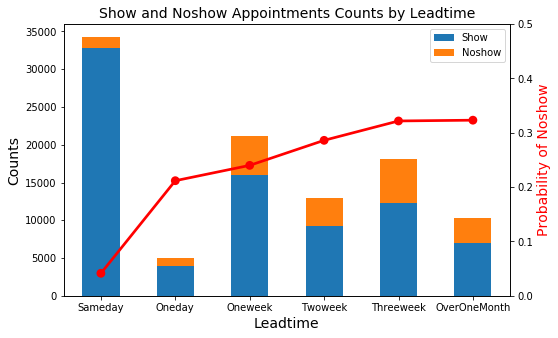

In [28]:
#plot chart
fig, ax1 = plt.subplots(figsize=(8,5))
df_leadtime.plot(kind = 'bar', stacked = True, rot=0, ax = ax1)
# add labels and title
plt.ylabel('Counts', fontsize = 14)
plt.xlabel('Leadtime', fontsize = 14)
plt.title('Show and Noshow Appointments Counts by Leadtime', fontsize = 14)
# proportion of Noshow

No_show_P = df_repeat.query('Result == "Noshow"').Leadtime_cat.value_counts(sort=False)/df_repeat['Leadtime_cat'].value_counts(sort=False)
#add lables
ax2 = ax1.twinx()
ax2.set_ylim([0, 0.5])
sns.pointplot(x= No_show_P.index, y= No_show_P, color = 'r', ax=ax2)
plt.ylabel('Probability of Noshow', fontsize =14, color = 'r')
plt.show()

> Shown in the above figure, the longer the lead time, the higher the no-show rate in the appoitments. But the largest difference comes from the sameday visits with others, one possible hypothesis is that some patients will feel better after the condition appears at the first time. However, some of them will not cancel their appointment once they feel better, resluting in higher no-show rate. 

### Age: 
> Commonly, the longer we wait for the appointment, the higher change we will forget about it. Even sometimes people write down in their canlendar, they still need some reminder if they usually do not check their calendar quite often.

In [29]:
# gorup patient showup by ages
Show_Patient_count = df_repeat.query('Result == "Show"').Patient.value_counts(sort=False)
Noshow_Patient_count = df_repeat.query('Result == "Noshow"').Patient.value_counts(sort=False)
df_Patient = pd.DataFrame({'Show':Show_Patient_count, 'Noshow':Noshow_Patient_count})

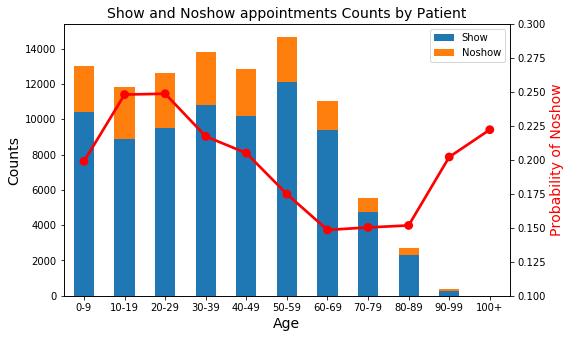

In [30]:
#plot chart
fig, ax1 = plt.subplots(figsize=(8,5))
df_Patient.plot(kind = 'bar', stacked = True, rot=0, ax = ax1)
# add labels and title
plt.ylabel('Counts', fontsize = 14)
plt.xlabel('Age', fontsize = 14)
plt.title('Show and Noshow appointments Counts by Patient', fontsize = 14)
# proportion of Noshow

No_show_P = df_repeat.query('Result == "Noshow"').Patient.value_counts(sort=False)/df_repeat['Patient'].value_counts(sort=False)

ax2 = ax1.twinx()
ax2.set_ylim([0.1, 0.3])
sns.pointplot(x= No_show_P.index, y= No_show_P, color = 'r', ax=ax2)
plt.ylabel('Probability of Noshow', fontsize =14,color = 'r')
plt.show()

### Scholarship: 
> Commonly, the longer we wait for the appointment, the higher change we will forget about it. Even sometimes people write down in their canlendar, they still need some reminder if they usually do not check their calendar quite often.

In [31]:
# count patient show and noshow by scholarship
Scholarship_count_Show = df_repeat.query('Result == "Show"').Scholarship.value_counts()
Scholarship_count_Noshow = df_repeat.query('Result == "Noshow"').Scholarship.value_counts()
Scholarship_counts = pd.DataFrame({'Show':Scholarship_count_Show, 
                                  'Noshow':Scholarship_count_Noshow})

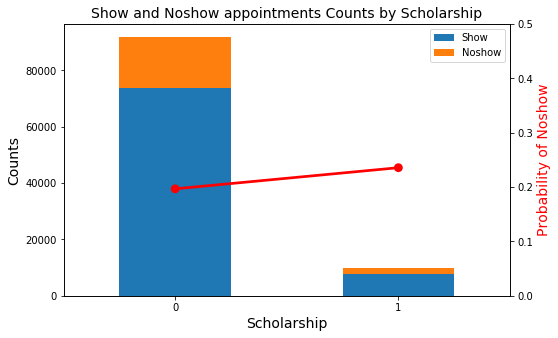

In [32]:
fig, ax1 = plt.subplots(figsize=(8,5))
Scholarship_counts.plot(kind = 'bar', stacked = True, rot=0, ax = ax1)
# add labels and title
plt.ylabel('Counts', fontsize = 14)
plt.xlabel('Scholarship', fontsize = 14)
plt.title('Show and Noshow appointments Counts by Scholarship', fontsize = 14)
# proportion of Noshow

No_show_P = df_repeat.query('Result == "Noshow"').Scholarship.value_counts(sort=False)/df_repeat['Scholarship'].value_counts(sort=False)

ax2 = ax1.twinx()
ax2.set_ylim([0, 0.5])
sns.pointplot(x= No_show_P.index, y= No_show_P, color = 'r', ax=ax2)
plt.ylabel('Probability of Noshow', fontsize =14, color = 'r')
plt.show()

### Gender: 
> Commonly, the longer we wait for the appointment, the higher change we will forget about it. Even sometimes people write down in their canlendar, they still need some reminder if they usually do not check their calendar quite often.

In [33]:
# count patient show and noshow by 'Gender'
Gender_count_Show = df_repeat.query('Result == "Show"').Gender.value_counts()
Gender_count_Noshow = df_repeat.query('Result == "Noshow"').Gender.value_counts()
Gender_counts = pd.DataFrame({'Show':Gender_count_Show, 
                                  'Noshow':Gender_count_Noshow})

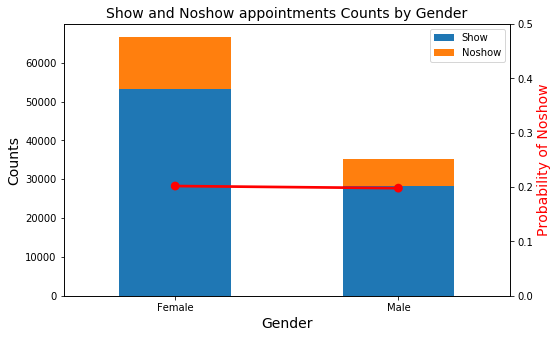

In [34]:
fig, ax1 = plt.subplots(figsize=(8,5))
Gender_counts.plot(kind = 'bar', stacked = True, rot=0 ,ax = ax1)
# add labels and title
plt.ylabel('Counts', fontsize = 14)
plt.xlabel('Gender', fontsize = 14)
plt.title('Show and Noshow appointments Counts by Gender', fontsize = 14)
# proportion of Noshow

No_show_P = df_repeat.query('Result == "Noshow"').Gender.value_counts(sort=False)/df_repeat['Gender'].value_counts(sort=False)

ax2 = ax1.twinx()
ax2.set_ylim([0, 0.5])
sns.pointplot(x= ['Female','Male'], y= No_show_P, color = 'r', ax=ax2)
plt.ylabel('Probability of Noshow',fontsize =14, color = 'r')
plt.show()

In [35]:
SMS_count_Show = df_repeat.query('Result == "Show"').SMS_received.value_counts()
SMS_count_Noshow = df_repeat.query('Result == "Noshow"').SMS_received.value_counts()
SMS_counts = pd.DataFrame({'Show':SMS_count_Show, 
                                  'Noshow':SMS_count_Noshow})

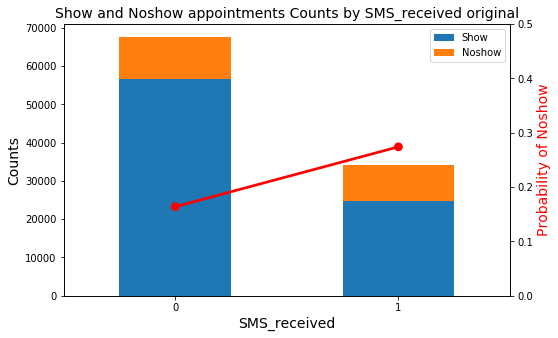

In [36]:
fig, ax1 = plt.subplots(figsize=(8,5))
SMS_counts.plot(kind = 'bar', stacked = True, rot=0 ,ax = ax1)
# add labels and title
plt.ylabel('Counts', fontsize = 14)
plt.xlabel('SMS_received', fontsize = 14)
plt.title('Show and Noshow appointments Counts by SMS_received original', fontsize = 14)
# proportion of Noshow

No_show_P = df_repeat.query('Result == "Noshow"').SMS_received.value_counts(sort=False)/df_repeat['SMS_received'].value_counts(sort=False)

ax2 = ax1.twinx()
ax2.set_ylim([0, 0.5])
sns.pointplot(x= [0,1], y= No_show_P, color = 'r', ax=ax2)
plt.ylabel('Probability of Noshow',fontsize =14, color = 'r')
plt.show()


In [37]:
# group patient noshow count by leadtime
SMS_count = df_repeat.query('SMS_received == 1').Leadtime_cat.value_counts(sort=False)
NoSMS_count = df_repeat.query('SMS_received == 0').Leadtime_cat.value_counts(sort=False)
df_SMS = pd.DataFrame({'SMS':SMS_count, 'NoSMS':NoSMS_count})

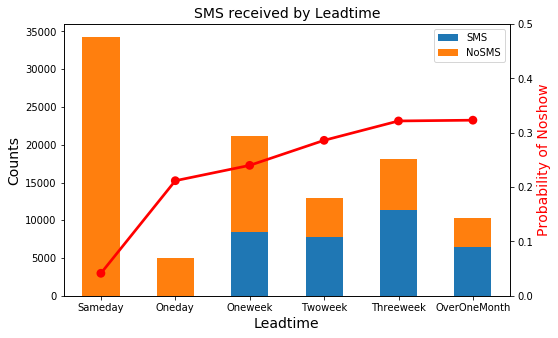

In [38]:
#plot chart
fig, ax1 = plt.subplots(figsize=(8,5))
df_SMS.plot(kind = 'bar', stacked = True, rot=0, ax = ax1)
# add labels and title
plt.ylabel('Counts', fontsize = 14)
plt.xlabel('Leadtime', fontsize = 14)
plt.title('SMS received by Leadtime', fontsize = 14)

# proportion of Noshow
No_show_P = df_repeat.query('Result == "Noshow"').Leadtime_cat.value_counts(sort=False)/df_repeat['Leadtime_cat'].value_counts(sort=False)
#add lables
ax2 = ax1.twinx()
ax2.set_ylim([0, 0.5])
sns.pointplot(x= No_show_P.index, y= No_show_P, color = 'r', ax=ax2)
plt.ylabel('Probability of Noshow', fontsize =14, color = 'r')
plt.show()


In [39]:
df_repeat.groupby('Leadtime')['SMS_received'].mean().sort_values().head(10)


Leadtime
0      0.000
1      0.000
2      0.000
82     0.000
105    0.000
108    0.000
126    0.000
133    0.000
162    0.000
80     0.125
Name: SMS_received, dtype: float64

In [40]:
df_SMS = df_repeat.query('Leadtime >2 ')
df_SMS.shape

(56046, 21)

In [41]:
SMS_count_Show = df_SMS.query('Result == "Show"').SMS_received.value_counts()
SMS_count_Noshow = df_SMS.query('Result == "Noshow"').SMS_received.value_counts()
SMS_counts = pd.DataFrame({'Show':SMS_count_Show, 
                                  'Noshow':SMS_count_Noshow})

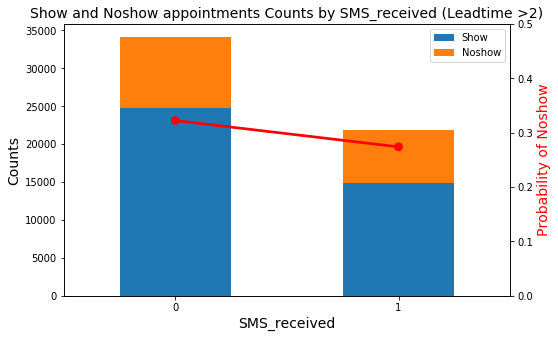

In [42]:
fig, ax1 = plt.subplots(figsize=(8,5))
SMS_counts.plot(kind = 'bar', stacked = True, rot=0 ,ax = ax1)
# add labels and title
plt.ylabel('Counts', fontsize = 14)
plt.xlabel('SMS_received', fontsize = 14)
plt.title('Show and Noshow appointments Counts by SMS_received (Leadtime >2)', fontsize = 14)
# proportion of Noshow

No_show_P = df_SMS.query('Result == "Noshow"').SMS_received.value_counts(sort=False)/df_SMS['SMS_received'].value_counts(sort=False)

ax2 = ax1.twinx()
ax2.set_ylim([0, 0.5])
sns.pointplot(x= ['0','1'], y= No_show_P, color = 'r', ax=ax2)
plt.ylabel('Probability of Noshow',fontsize =14, color = 'r')
plt.show()


In [80]:
Revisit_count_Show = df_revisit.query('Result == "Show"').PreviousShow.value_counts()
Revisit_count_Noshow = df_revisit.query('Result == "Noshow"').PreviousShow.value_counts()
Revisit_counts = pd.DataFrame({'Show':Revisit_count_Show, 
                                  'Noshow':Revisit_count_Noshow})

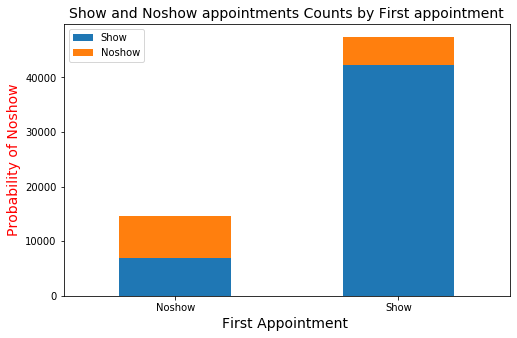

In [87]:
fig, ax1 = plt.subplots(figsize=(8,5))
Revisit_counts.plot(kind = 'bar', stacked = True, rot=0 ,ax = ax1)
# add labels and title
plt.ylabel('Counts', fontsize = 14)
plt.xlabel('First Appointment ', fontsize = 14)
plt.title('Show and Noshow appointments Counts by First appointment', fontsize = 14)
# proportion of Noshow

#No_show_P = df_revisit.query('Result == "Show"').PreviousShow.value_counts(sort=False)/df_revisit['PreviousShow'].value_counts(sort=False)

#ax2 = ax1.twinx()
ax2.set_ylim([0, 1])
sns.pointplot(x= ['NoShow','Show'], y= No_show_P, color = 'r', ax=ax2)
plt.ylabel('Probability of Noshow',fontsize =14, color = 'r')
plt.show()

<a id='Prediction'></a>
# Modeling and Prediction
> **Goals**: In this section of the report, we will predict whether or not a patient will show up. Firstly, we will try to find the most important features for train model. Then, we will evaluate our model.From previous data explore, it seems like the lead time and age has a distinguish trend. Scikit has some package which can help us decide the importance of the features. 



### Feature selection: 
>From previous data explore, it seems like the lead time and age has a distinguish trend. Scikit has some package which can help us decide the importance of the features. 

In [45]:
df_repeat.loc[df_repeat['No_show']=='Yes', 'ResultNo'] = 0
df_repeat.loc[df_repeat['No_show']=='No', 'ResultNo'] = 1
df_model = df_repeat[['Gender', 'Age', 'Scholarship', 'Hypertension', 'Diabetes', 'Alcoholism', 'Handicap', 'SMS_received', 'Leadtime', 'ResultNo']].copy()
df_model.loc[df_model['Gender']=='F',"Gender"] = 0
df_model.loc[df_model['Gender']=='M','Gender'] = 1

df_model.head(2)


,Gender,Age,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,Leadtime,ResultNo
0,0,62,0,1,0,0,0,0,0,1.0
1,1,56,0,0,0,0,0,0,0,1.0


In [46]:
# import sklearn feature_selection
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

# Select features and labels
X = df_model.iloc[:,0:9 ]
y = df_model.iloc[:, -1]

In [47]:
# build feature selection model
bestfeatures = SelectKBest(score_func=chi2, k=9)
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs', 'Score']
featureScores.sort_values('Score')

,Specs,Score
0,Gender,1.414402
5,Alcoholism,3.720664
6,Handicap,8.567701
4,Diabetes,24.946573
2,Scholarship,76.314758
3,Hypertension,110.239885
7,SMS_received,1140.077630
1,Age,5116.228591
8,Leadtime,78215.953338


In [48]:
from sklearn.ensemble import ExtraTreesClassifier
model = ExtraTreesClassifier()
model.fit(X,y)

C:\Users\Hong\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


ExtraTreesClassifier(bootstrap=False, class_weight=None, criterion='gini',
                     max_depth=None, max_features='auto', max_leaf_nodes=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
                     oob_score=False, random_state=None, verbose=0,
                     warm_start=False)

In [49]:
print(model.feature_importances_)

[0.00694908 0.39039657 0.00415435 0.00607476 0.00429103 0.00374706
 0.00727522 0.03883946 0.53827248]


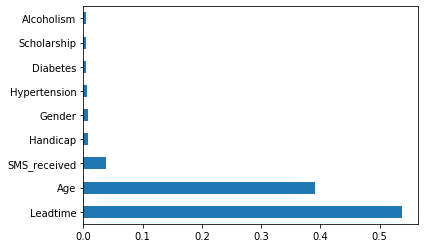

In [50]:
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

### Modeling: 
>From previous data explore, it seems like the lead time and age has a distinguish trend. Scikit has some package which can help us decide the importance of the features. 

In [51]:
# split dataset into train and test 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_model[['Age','Leadtime','Hypertension','Scholarship']], df_model['ResultNo'], test_size = 0.25, random_state=25 )
y_test.value_counts()

1.0    20385
0.0     5066
Name: ResultNo, dtype: int64

In [52]:
# import classifier
from sklearn.linear_model import LogisticRegression 
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, accuracy_score

In [53]:
import numpy as np


def plot_confusion_matrix(cm,
                          target_names,
                          title='Confusion matrix',
                          cmap=None,
                          normalize=True):
    """
    given a sklearn confusion matrix (cm), make a nice plot

    Arguments
    ---------
    cm:           confusion matrix from sklearn.metrics.confusion_matrix

    target_names: given classification classes such as [0, 1, 2]
                  the class names, for example: ['high', 'medium', 'low']

    title:        the text to display at the top of the matrix

    cmap:         the gradient of the values displayed from matplotlib.pyplot.cm
                  see http://matplotlib.org/examples/color/colormaps_reference.html
                  plt.get_cmap('jet') or plt.cm.Blues

    normalize:    If False, plot the raw numbers
                  If True, plot the proportions

    Usage
    -----
    plot_confusion_matrix(cm           = cm,                  # confusion matrix created by
                                                              # sklearn.metrics.confusion_matrix
                          normalize    = True,                # show proportions
                          target_names = y_labels_vals,       # list of names of the classes
                          title        = best_estimator_name) # title of graph

    Citiation
    ---------
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html

    """
    import matplotlib.pyplot as plt
    import numpy as np
    import itertools

    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Blues')

    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")


    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    plt.show()



In [54]:
# create an array of Classifiers
classifiers = []
model1 = LogisticRegression(random_state=0, penalty='l2', C=1, fit_intercept=True, solver='liblinear')
classifiers.append(model1)
model2 = RandomForestClassifier(n_estimators=100, criterion='entropy', max_features='auto', random_state=0)
classifiers.append(model2)
model3 = tree.DecisionTreeClassifier(random_state=0, criterion='entropy', splitter='best')
classifiers.append(model3)

In [55]:
for clf in classifiers:
    clf.fit(X_train, y_train)
    y_pred= clf.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print("Accuracy of %s is %s"%(type(clf).__name__, acc))
    cm = confusion_matrix(y_test, y_pred)
    print("Confusion Matrix of %s is %s"%(type(clf).__name__,cm))
    cr = classification_report(y_test, y_pred, target_names=['Noshow', 'Show'])
    print("Classifier report of %s is %s"%(type(clf).__name__, cr))
   

Accuracy of LogisticRegression is 0.7978075517661388
Confusion Matrix of LogisticRegression is [[   95  4971]
 [  175 20210]]
Classifier report of LogisticRegression is               precision    recall  f1-score   support

      Noshow       0.35      0.02      0.04      5066
        Show       0.80      0.99      0.89     20385

    accuracy                           0.80     25451
   macro avg       0.58      0.51      0.46     25451
weighted avg       0.71      0.80      0.72     25451

Accuracy of RandomForestClassifier is 0.7746257514439511
Confusion Matrix of RandomForestClassifier is [[  656  4410]
 [ 1326 19059]]
Classifier report of RandomForestClassifier is               precision    recall  f1-score   support

      Noshow       0.33      0.13      0.19      5066
        Show       0.81      0.93      0.87     20385

    accuracy                           0.77     25451
   macro avg       0.57      0.53      0.53     25451
weighted avg       0.72      0.77      0.73     254

### Random Forest Classifier

In [56]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
RanF = RandomForestClassifier(n_estimators=100, criterion='entropy', max_features='auto', random_state=0)
RanF.fit(X_train,y_train)
RanF_y_predict = RanF.predict(X_test)

Accuarcy of DecisionTree Classifier: 0.7746257514439511
              precision    recall  f1-score   support

      Noshow       0.33      0.13      0.19      5066
        Show       0.81      0.93      0.87     20385

    accuracy                           0.77     25451
   macro avg       0.57      0.53      0.53     25451
weighted avg       0.72      0.77      0.73     25451



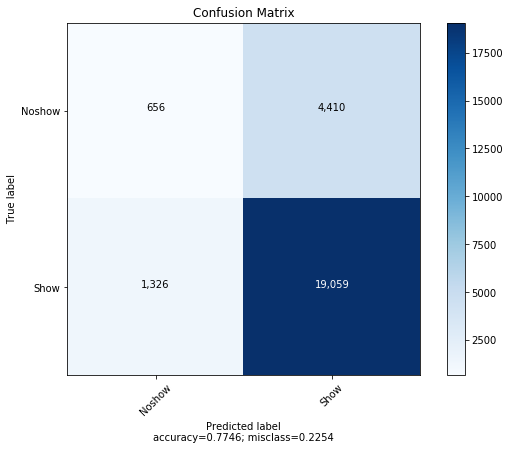

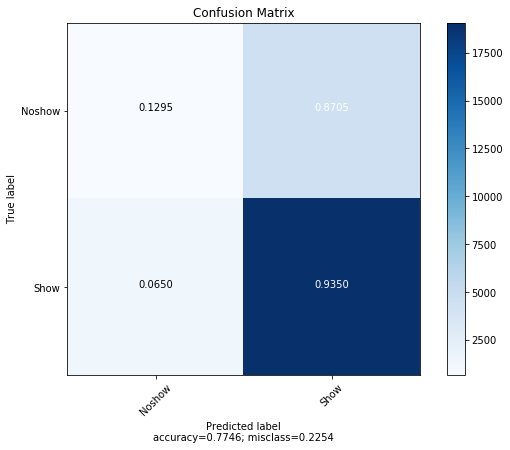

In [57]:
print('Accuarcy of DecisionTree Classifier:', RanF.score(X_test, y_test))
print(classification_report(y_test, RanF_y_predict, target_names=['Noshow', 'Show']))

RanF_confusion = confusion_matrix(y_test, RanF_y_predict)
plot_confusion_matrix(cm           = RanF_confusion, 
                      normalize    = False,
                      target_names = ['Noshow', 'Show'],
                      title        = "Confusion Matrix")
plot_confusion_matrix(cm           = RanF_confusion, 
                      normalize    = True,
                      target_names = ['Noshow', 'Show'],
                      title        = "Confusion Matrix")

### Oversample

In [58]:
# create show and noshow data
y_show = y_train[y_train == 1]
X_show = X_train.loc[y_show.index]

y_noshow = y_train[y_train == 0]
X_noshow =X_train.loc[y_noshow.index]

In [59]:
oversample_X = pd.concat([X_show, X_noshow,X_noshow,X_noshow,X_noshow,])
oversample_y = pd.concat([y_show, y_noshow, y_noshow,y_noshow,y_noshow,])

In [60]:
RanF_oversample = RandomForestClassifier(n_estimators=100, criterion='entropy', max_features='auto', random_state=0)
RanF_oversample.fit(oversample_X,oversample_y)
RanF_oversample_y_predict = RanF_oversample.predict(X_test)

Accuarcy of DecisionTree Classifier: 0.6305449687635063
              precision    recall  f1-score   support

      Noshow       0.30      0.62      0.40      5066
        Show       0.87      0.63      0.73     20385

    accuracy                           0.63     25451
   macro avg       0.58      0.63      0.57     25451
weighted avg       0.76      0.63      0.67     25451



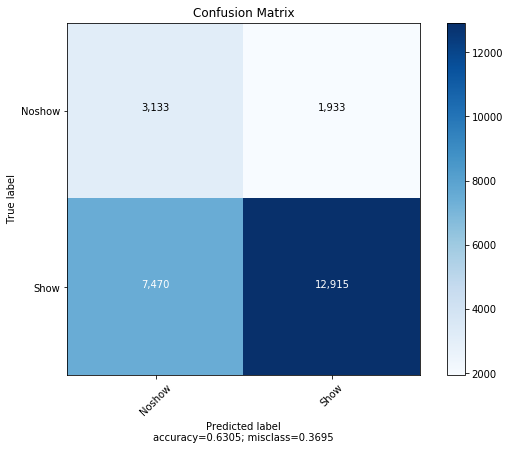

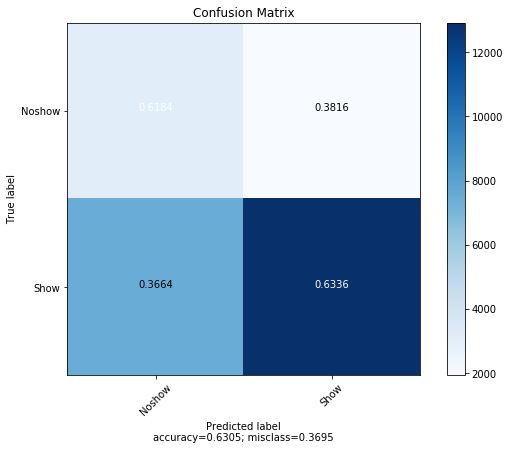

In [61]:
print('Accuarcy of DecisionTree Classifier:', RanF_oversample.score(X_test, y_test))
print(classification_report(y_test, RanF_oversample_y_predict, target_names=['Noshow', 'Show']))

RanF_oversample_confusion = confusion_matrix(y_test, RanF_oversample_y_predict)
plot_confusion_matrix(cm           = RanF_oversample_confusion, 
                      normalize    = False,
                      target_names = ['Noshow', 'Show'],
                      title        = "Confusion Matrix")
plot_confusion_matrix(cm           = RanF_oversample_confusion, 
                      normalize    = True,
                      target_names = ['Noshow', 'Show'],
                      title        = "Confusion Matrix")

### SMOTE

In [62]:
from imblearn.over_sampling import SMOTE

x_train_smote, y_train_smote = SMOTE(ratio='auto', k_neighbors=5, m_neighbors=10,
      out_step=0.5, kind='regular', svm_estimator=None, n_jobs=-1).fit_sample(X_train, y_train)

In [63]:
from collections import Counter

print('The original class distribution: {},'.format(Counter(y_train)))
print('After SMOTE class distribution:  {}'.format(Counter(y_train_smote)))

The original class distribution: Counter({1.0: 60998, 0.0: 15354}),
After SMOTE class distribution:  Counter({1.0: 60998, 0.0: 60998})


In [64]:
RanF_smote = RandomForestClassifier(n_estimators=100, criterion='entropy', max_features='auto', random_state=0)
RanF_smote.fit(x_train_smote, y_train_smote)
RanF_smote_y_predict = RanF_smote.predict(X_test)

Accuarcy of DecisionTree Classifier: 0.6345526698361558
              precision    recall  f1-score   support

      Noshow       0.29      0.59      0.39      5066
        Show       0.86      0.65      0.74     20385

    accuracy                           0.63     25451
   macro avg       0.58      0.62      0.57     25451
weighted avg       0.75      0.63      0.67     25451



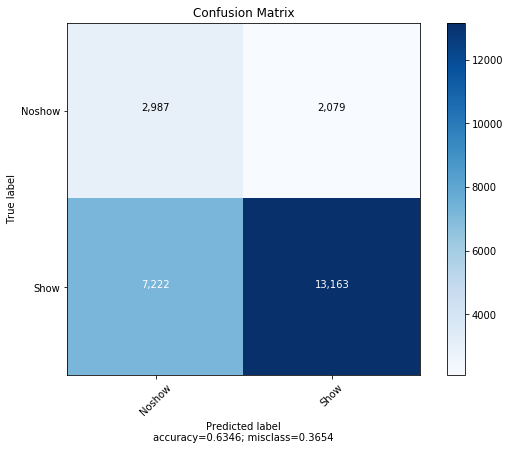

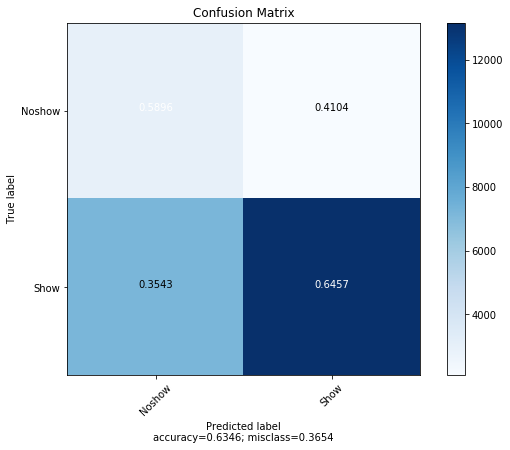

In [65]:
print('Accuarcy of DecisionTree Classifier:', RanF_smote.score(X_test, y_test))
print(classification_report(y_test, RanF_smote_y_predict, target_names=['Noshow', 'Show']))

RanF_smote_confusion = confusion_matrix(y_test, RanF_smote_y_predict)
plot_confusion_matrix(cm           = RanF_smote_confusion, 
                      normalize    = False,
                      target_names = ['Noshow', 'Show'],
                      title        = "Confusion Matrix")
plot_confusion_matrix(cm           = RanF_smote_confusion, 
                      normalize    = True,
                      target_names = ['Noshow', 'Show'],
                      title        = "Confusion Matrix")

## Revisit Patients

### Feature selection

In [66]:
df_revisit.loc[df_revisit['No_show']=='Yes', 'ResultNo'] = 0
df_revisit.loc[df_revisit['No_show']=='No', 'ResultNo'] = 1
df_model_2 = df_revisit[['Gender', 'Age', 'Scholarship', 'Hypertension', 'Diabetes', 'Alcoholism', 'Handicap', 'SMS_received', 'Leadtime', 'ResultNo','PreviousShow']].copy()
df_model_2.loc[df_model_2['Gender']=='F',"Gender"] = 0
df_model_2.loc[df_model_2['Gender']=='M','Gender'] = 1
df_model_2.loc[df_model_2['PreviousShow']=='Noshow', 'First'] = 0
df_model_2.loc[df_model_2['PreviousShow']=='Show', 'First'] = 1
df_model_2.head(2)

C:\Users\Hong\Anaconda3\lib\site-packages\pandas\core\indexing.py:362: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
C:\Users\Hong\Anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


,Gender,Age,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,Leadtime,ResultNo,PreviousShow,First
3,0,8,0,0,0,0,0,0,0,1.0,Noshow,0.0
48641,0,8,0,0,0,0,0,0,24,0.0,Noshow,0.0


In [67]:
# Select features and labels
X = df_model_2.iloc[:,[0,1,2,3,4,5,6,7,8,11]]
y = df_model_2.iloc[:, [9]]

In [68]:
# build feature selection model
bestfeatures = SelectKBest(score_func=chi2, k=9)
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs', 'Score']
featureScores.sort_values('Score')

,Specs,Score
5,Alcoholism,0.000772
6,Handicap,3.509680
0,Gender,4.567783
4,Diabetes,10.695794
3,Hypertension,44.576309
2,Scholarship,59.215011
7,SMS_received,682.409691
1,Age,2453.701581
9,First,2746.109151
8,Leadtime,42429.834602


In [69]:
# split dataset into train and test 
from sklearn.model_selection import train_test_split
X_train_revisit, X_test_revisit, y_train_revisit, y_test_revisit = train_test_split(df_model_2[['Age','Leadtime','Hypertension','Scholarship','First']], df_model_2['ResultNo'], test_size = 0.25, random_state=25 )
y_test_revisit.value_counts()

1.0    12312
0.0     3174
Name: ResultNo, dtype: int64

In [70]:
from imblearn.over_sampling import SMOTE

x_revisit_train_smote, y_revisit_train_smote = SMOTE(ratio='auto', k_neighbors=5, m_neighbors=10,
      out_step=0.5, kind='regular', svm_estimator=None, n_jobs=-1).fit_sample(X_train_revisit, y_train_revisit)

In [71]:
from collections import Counter

print('The original class distribution: {},'.format(Counter(y_train_revisit)))
print('After SMOTE class distribution:  {}'.format(Counter(y_revisit_train_smote)))


The original class distribution: Counter({1.0: 36776, 0.0: 9681}),
After SMOTE class distribution:  Counter({1.0: 36776, 0.0: 36776})


In [72]:
RanF_smote_revisit = RandomForestClassifier(n_estimators=100, criterion='entropy', max_features='auto', random_state=0)
RanF_smote_revisit.fit(x_revisit_train_smote, y_revisit_train_smote)
RanF_smote_revisit_y_predict = RanF_smote_revisit.predict(X_test_revisit)

Accuarcy of DecisionTree Classifier: 0.7901330233759525
              precision    recall  f1-score   support

      Noshow       0.49      0.51      0.50      3174
        Show       0.87      0.86      0.87     12312

    accuracy                           0.79     15486
   macro avg       0.68      0.69      0.68     15486
weighted avg       0.79      0.79      0.79     15486



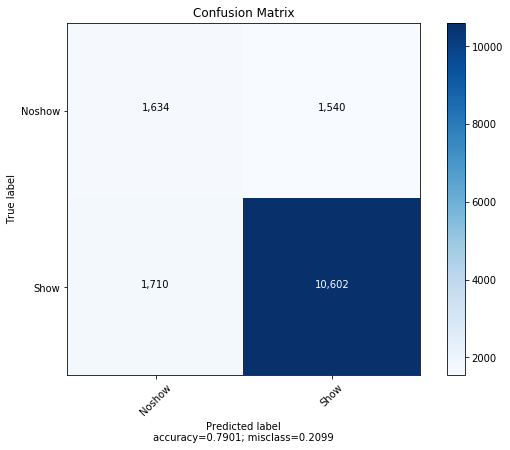

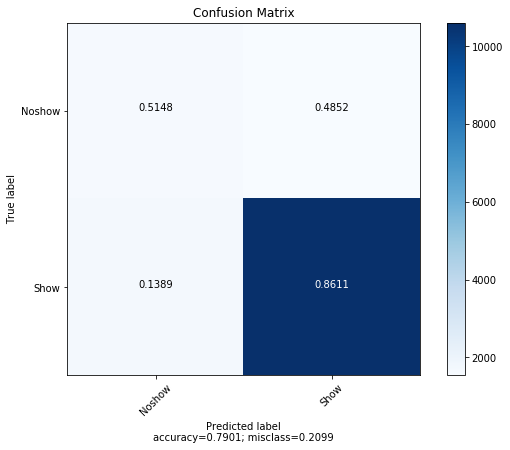

In [73]:
print('Accuarcy of DecisionTree Classifier:', RanF_smote_revisit.score(X_test_revisit, y_test_revisit))
print(classification_report(y_test_revisit, RanF_smote_revisit_y_predict, target_names=['Noshow', 'Show']))

RanF_smote_revisit_confusion = confusion_matrix(y_test_revisit, RanF_smote_revisit_y_predict)
plot_confusion_matrix(cm           = RanF_smote_revisit_confusion, 
                      normalize    = False,
                      target_names = ['Noshow', 'Show'],
                      title        = "Confusion Matrix")
plot_confusion_matrix(cm           = RanF_smote_revisit_confusion, 
                      normalize    = True,
                      target_names = ['Noshow', 'Show'],
                      title        = "Confusion Matrix")

<a id='wrangling'></a>
## Conclusion

> **In summary**: After exploring the no show medical appointment data, we find that two features (lead time and age) have significant influence on patients' no show rate. It seems like eldly people tend to show up more often, and in order to figure out the underneath reason, more dedicated studies are needed. In addition, the same day appointments have the highest show rate. 
We also did train this data set with two different classification models, both of them show high accuracy in predicting show up patients. 
1. Longer lead time has higher no show rate, since not every patient receive message reminder, the institution should increase the reminder coverage for all patients.
2. Younger patients has higher no show rate.
3. We got higher accuracy and no show recall from revisit patient group, so that mean keep a good record of previous visit is important for future prediction.
4. We can over sample our data points to increase no show recall. 





### References:
1.Using no-show modeling to  improve clinic performance. J.Daggy, et al. Health Informatics Journal, 2010

2.Deep Learning for Predicting Non-attendance in Hospital Outpatient Appointments. M Dashtban, et al. Proceedingsofthe52ndHawaiiInternationalConferenceonSystemSciences, 2019

3.Predicting appointment misses in hospitals using data analytics. S. Devasahay, et al. mHealth 2017

